In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# color palette
palette = [
'#6ee1fa',
'#65d4ee',
'#5cc6e3',
'#54b9d7',
'#4caccb',
'#449fbf',
'#3c93b3',
'#3586a7',
'#2d7a9b',
'#266e8f',
'#1f6282',
'#175776',
'#104c6b',
'#07415f',
'#003653'
]
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)

In [3]:
# import the data
df = pd.read_excel('../Coffee Shop Sales.xlsx')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# Data Cleaning

In [5]:
# set transaction_id as dataframe index
df.set_index(df['transaction_id'])
# removed the transaction_id column and overwrited the df
df.drop(columns='transaction_id', inplace=True)

In [6]:
# checking the data types
df.info()
# changing the time of transaction_time 
df['transaction_time'] = pd.to_datetime(df['transaction_time'],format='%H:%M:%S').dt.time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_date  149116 non-null  datetime64[ns]
 1   transaction_time  149116 non-null  object        
 2   transaction_qty   149116 non-null  int64         
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   unit_price        149116 non-null  float64       
 7   product_category  149116 non-null  object        
 8   product_type      149116 non-null  object        
 9   product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 11.4+ MB


In [7]:
# Remove leading/trailing whitespace from strings
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# check for duplicates & null values
df.drop_duplicates(inplace=True)
df.isna()

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
149111,False,False,False,False,False,False,False,False,False,False
149112,False,False,False,False,False,False,False,False,False,False
149113,False,False,False,False,False,False,False,False,False,False
149114,False,False,False,False,False,False,False,False,False,False


In [8]:
# calculating Revenue
df['revenue'] = df['transaction_qty'] * df['unit_price']

# Analyze The Data    

In [10]:
df[['transaction_qty', 'transaction_qty', 'transaction_qty']].describe() 

,transaction_qty,transaction_qty,transaction_qty
count,148718.000000,148718.000000,148718.000000
mean,1.439402,1.439402,1.439402
std,0.542754,0.542754,0.542754
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,8.000000,8.000000,8.000000


In [12]:
# Revenue by product
rev_by_prod = df.groupby(by=['product_type'])['revenue'].sum().sort_values(ascending=False)

# count of each product
tc_by_prod = df['product_type'].value_counts().sort_values(ascending=False)

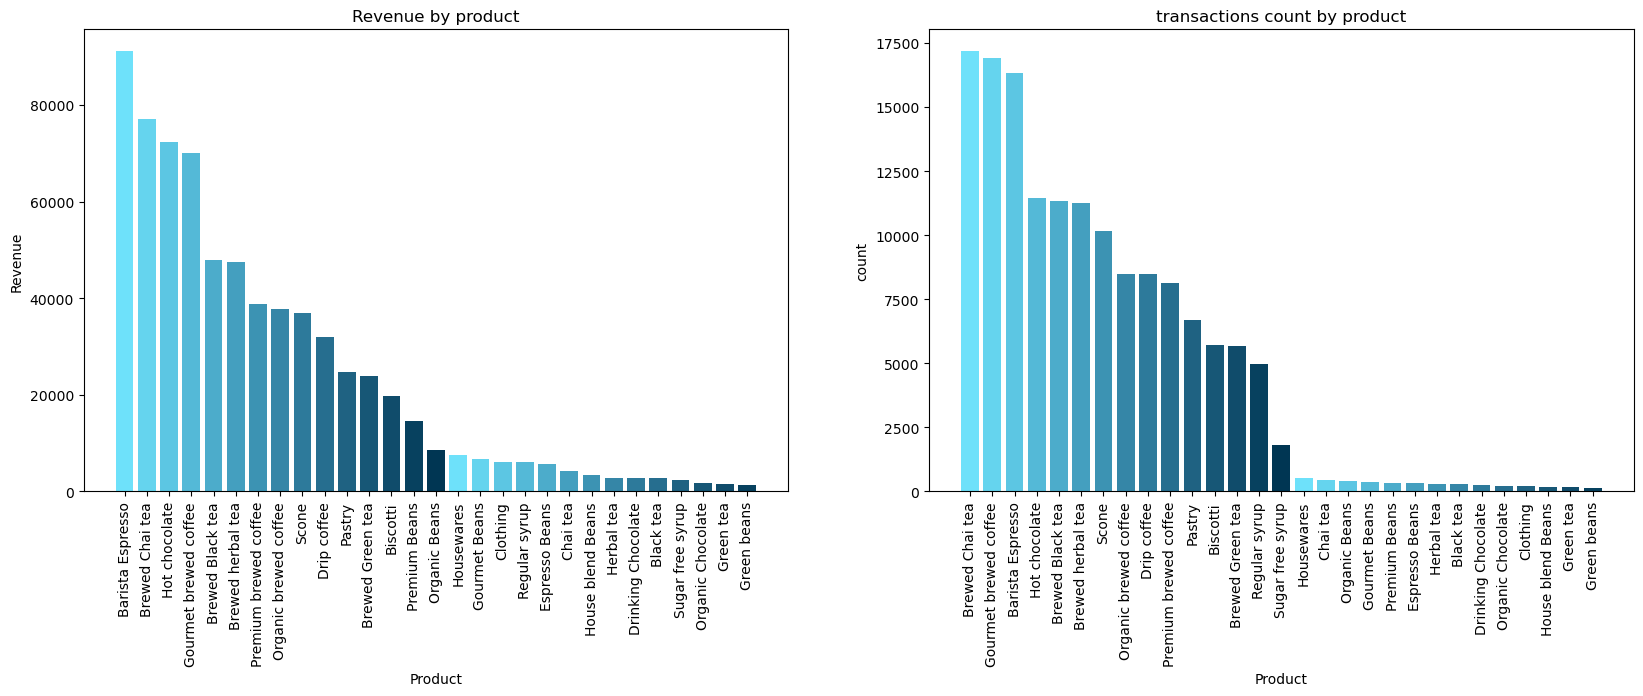

In [152]:
# bar chart
fig, axs = plt.subplots(1, 2, figsize=(20,6))


# first graph || sales
axs[0].bar(rev_by_prod.index, rev_by_prod, color=palette)
axs[0].set_title('Revenue by product')
axs[0].set_xlabel('Product')
axs[0].set_ylabel('Revenue')
axs[0].tick_params(axis='x', rotation=90)


# second graph || sales
axs[1].bar(tc_by_prod.index, tc_by_prod, color=palette)
axs[1].set_title('transactions count by product')
axs[1].set_xlabel('Product')
axs[1].set_ylabel('count')
axs[1].tick_params(axis='x', rotation=90)

plt.savefig('rev_&_tc_to_prod')
plt.show()

In [14]:
# Revenue by Category
rev_by_cat = df.groupby(by=['product_category'])['revenue'].sum().sort_values()

# count of each Category
tc_by_cat = df['product_category'].value_counts().sort_values()

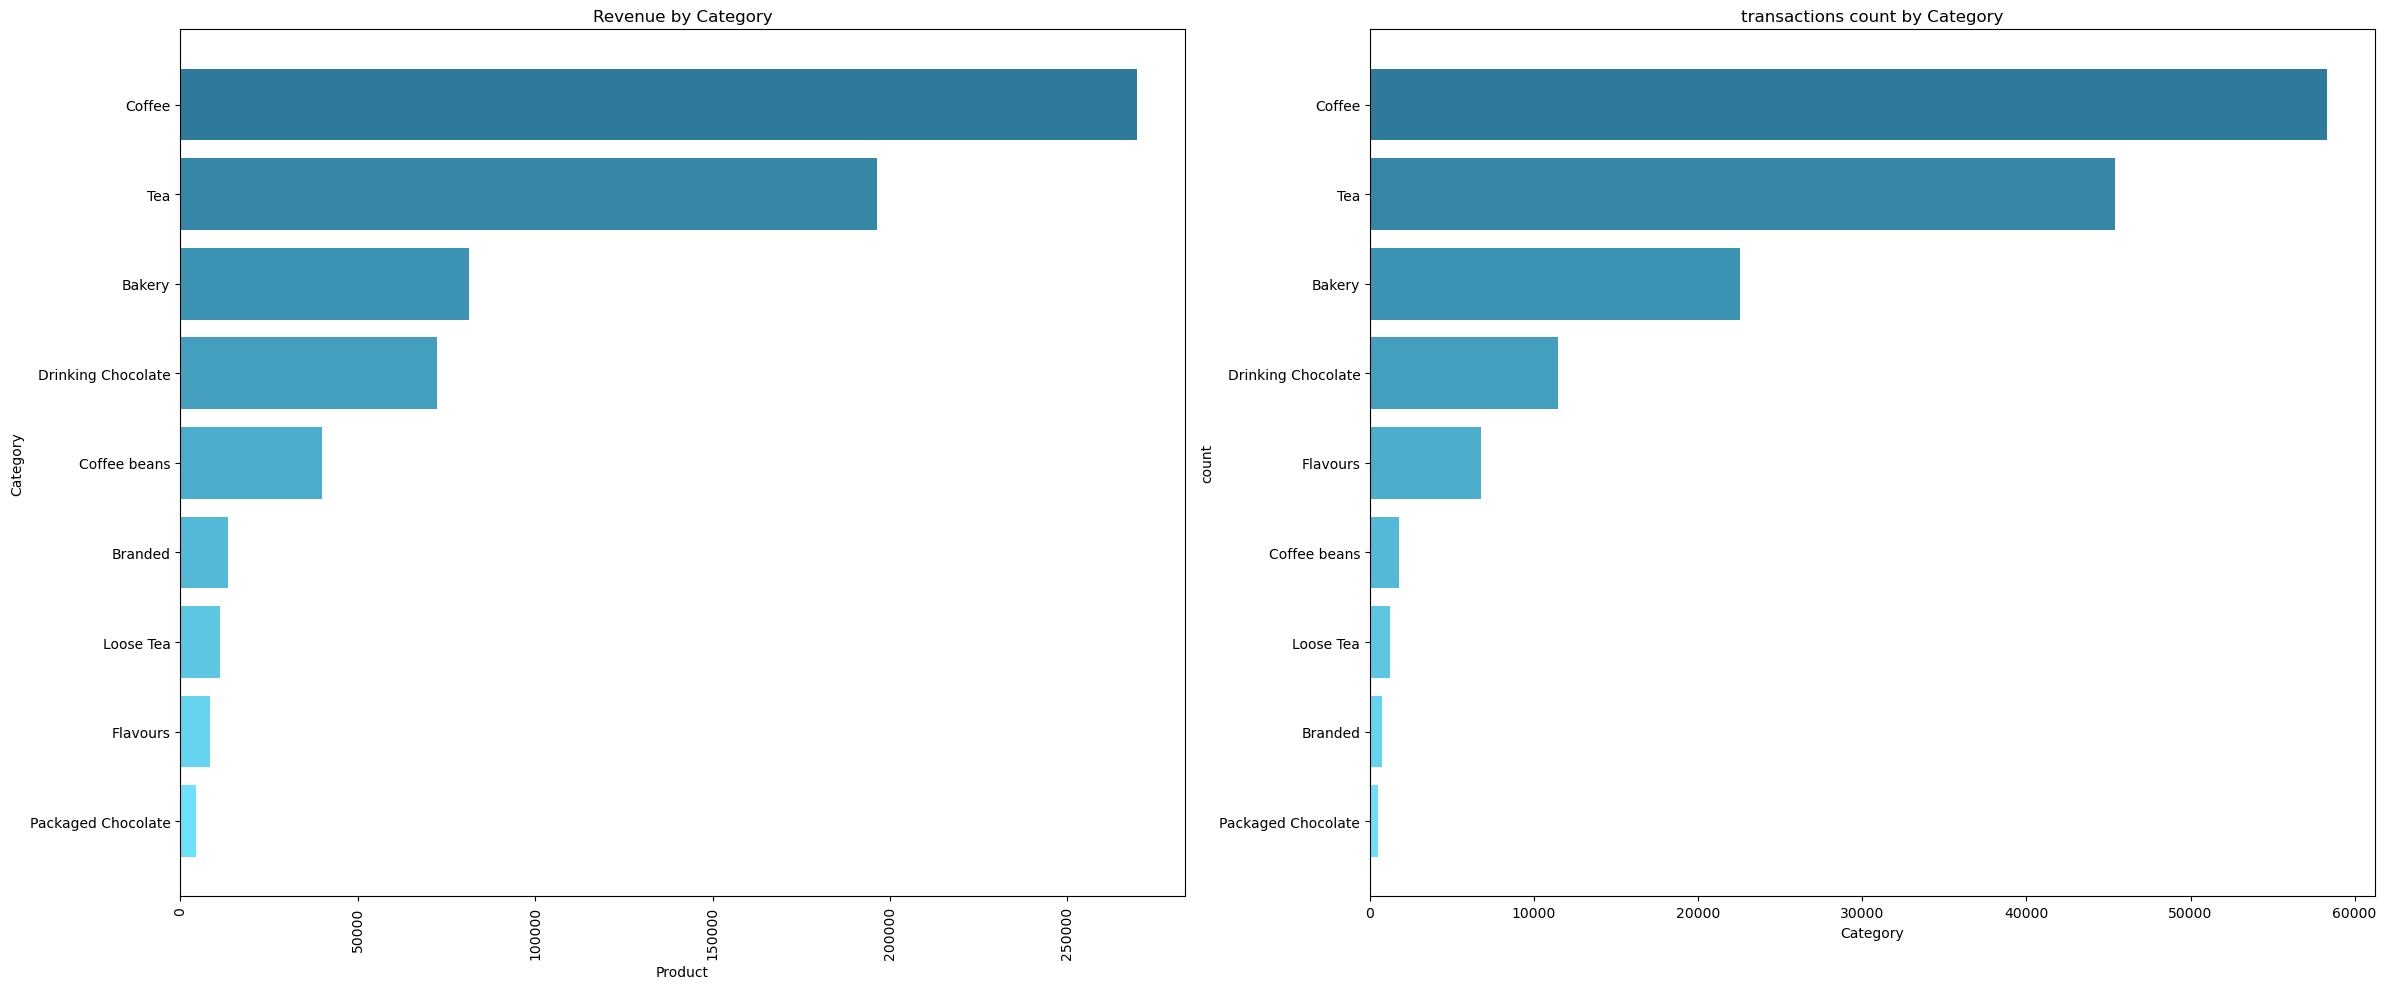

In [154]:
# h-bar chart
fig, axs = plt.subplots(1, 2, figsize=(24,10))


# first graph || sales
axs[0].barh(rev_by_cat.index, rev_by_cat, color=palette)
axs[0].set_title('Revenue by Category')
axs[0].set_xlabel('Product')
axs[0].set_ylabel('Category')
axs[0].tick_params(axis='x', rotation=90)


# second graph || sales
axs[1].barh(tc_by_cat.index,tc_by_cat  , color=palette)
axs[1].set_title('transactions count by Category')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('count')
plt.tight_layout()

plt.savefig('rev_&_tc_to_cat')
plt.show()

In [16]:
# Revenue & Transaction by day
rev_d = df.groupby(by=['transaction_date'])['revenue'].sum()
tc_d = df.groupby(by=['transaction_date'])['transaction_qty'].count()

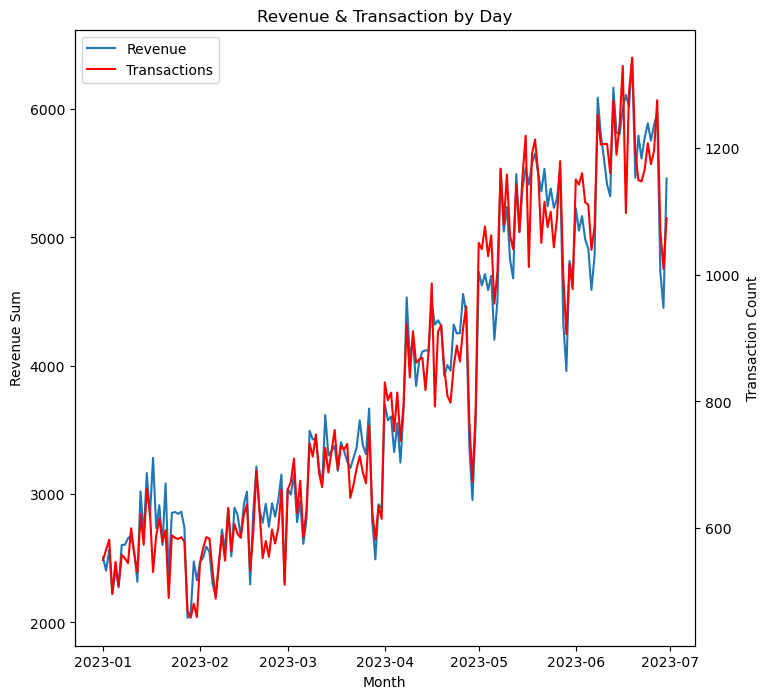

In [157]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
plt.title('Revenue & Transaction by Day')
# first plot
ax1.plot(rev_d, label='Revenue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue Sum')

# second plot
ax2.plot(tc_d, color='red', label='Transactions')
ax2.set_ylabel('Transaction Count')

# Gather the handles and labels from both axes
lines_ax1, labels_ax1 = ax1.get_legend_handles_labels()  # Get lines and labels from ax1
lines_ax2, labels_ax2 = ax2.get_legend_handles_labels()  # Get lines and labels from ax2

# Combine the handles and labels from both axes
lines = lines_ax1 + lines_ax2
labels = labels_ax1 + labels_ax2

# Add the legend
ax1.legend(lines, labels, loc='upper left')
plt.savefig('rev_&_tc_by_day')
plt.show()

In [18]:
# Revenue & Transaction by month
rev_m = df.groupby(df['transaction_date'].dt.to_period('M'))['revenue'].sum()
tc_m = df.groupby(df['transaction_date'].dt.to_period('M'))['transaction_qty'].count()

# convert Period to string 
rev_m.index = rev_m.index.astype(str)
tc_m.index = tc_m.index.astype(str)

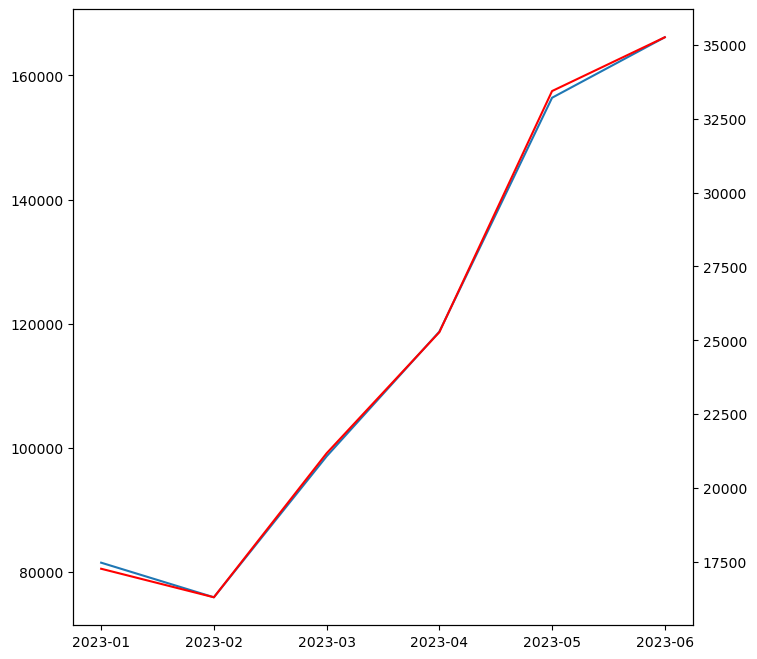

In [159]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(rev_m)
ax2.plot(tc_m, color='red')

plt.savefig('rev_&_tc_to_month')

In [101]:
# Revenue & Tc by hour
rev_h = df.groupby(df['transaction_time'])['revenue'].sum()
tc_h = df.groupby(df['transaction_time'])['transaction_qty'].count()

rev_h.index = rev_h.index.astype(str) 
tc_h.index = tc_h.index.astype(str) 

In [136]:
# average revenue by store
rev_s = df.groupby(df['store_location'])['revenue'].mean().sort_values()

# tc by store
tc_s = df.groupby(df['store_location'])['transaction_qty'].count().sort_values()

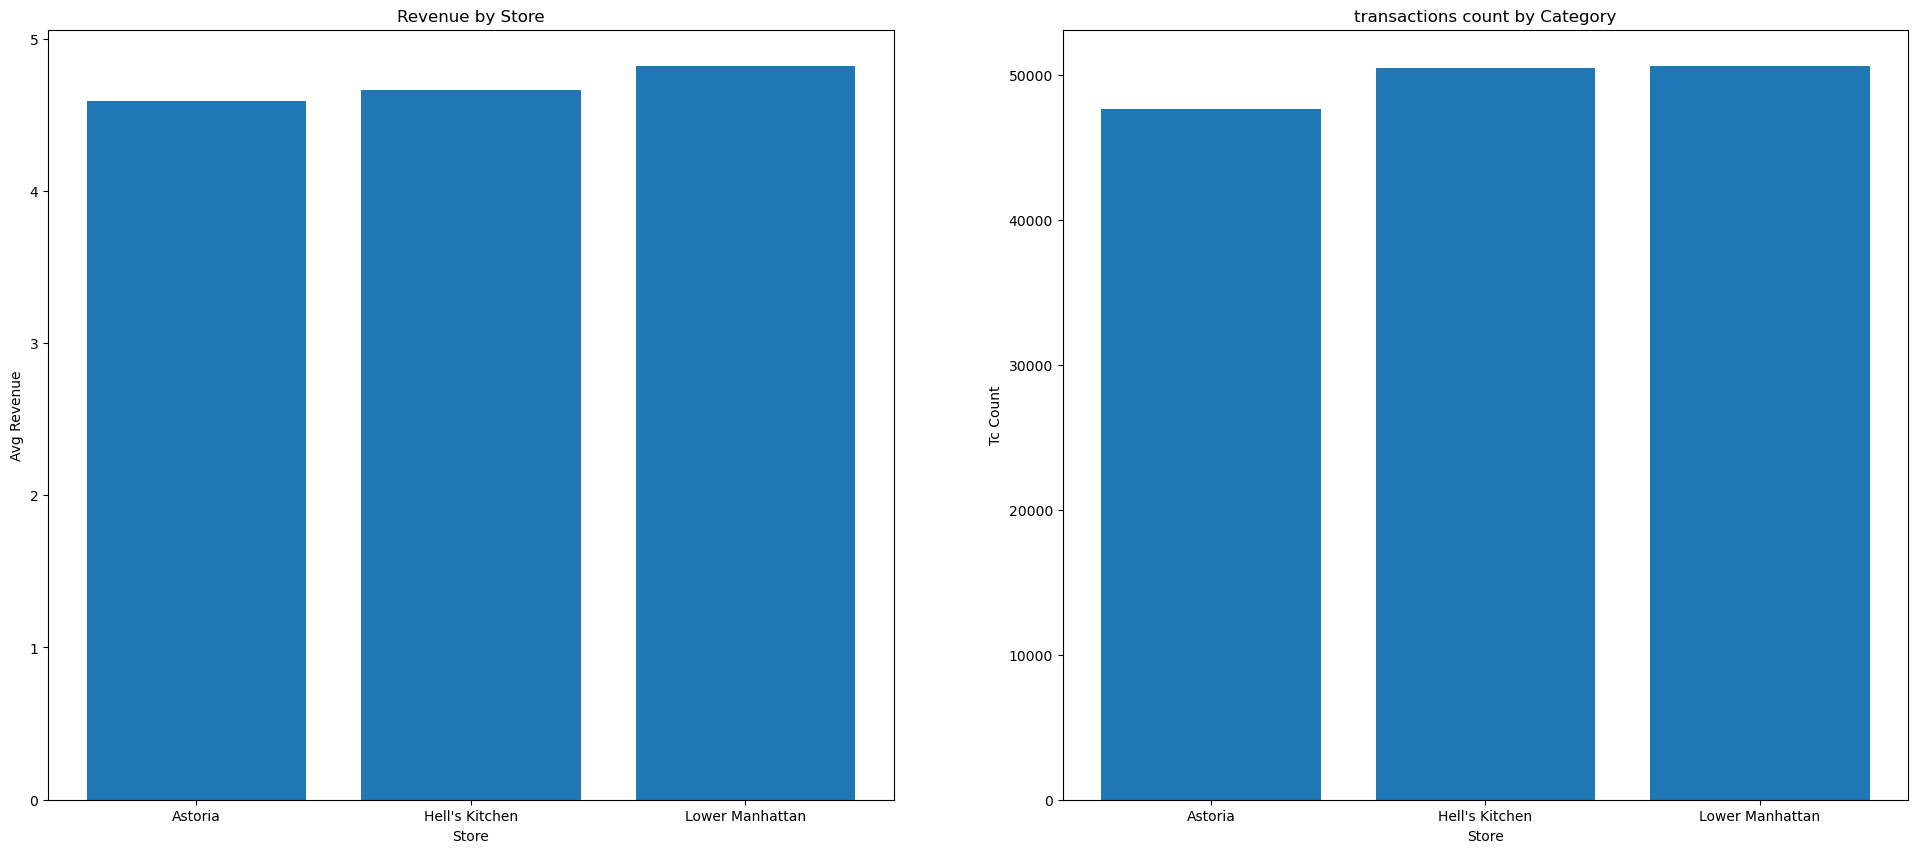

In [161]:
# h-bar chart
fig, axs = plt.subplots(1, 2, figsize=(24,10))

# first graph || sales
axs[0].bar(rev_s.index, rev_s)
axs[0].set_title('Revenue by Store')
axs[0].set_xlabel('Store')
axs[0].set_ylabel('Avg Revenue')

# second graph || sales
axs[1].bar(rev_s.index, tc_s)
axs[1].set_title('transactions count by Category')
axs[1].set_xlabel('Store')
axs[1].set_ylabel('Tc Count')

plt.savefig('rev_&_tc_by_store')
plt.show()